In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
%matplotlib inline
plt.style.use('default')
line_markers = ['-.','-,','-o','-v','-^','-<','->','-1','-2','-3','-4','-s','-p','-*','-h','-H','-+','-x','-D','-d','-|','-_']
line_markers = ['*','h','<','4','x','d','|','_']

root = './'

In [2]:
def accuracy(file_name, tasknum = 10):
    acc = np.zeros(tasknum)
    with open(file_name, 'r') as f:
        data = f.read().splitlines()
        for i in range(len(data)):
            acc[i] = data[i]
    return acc

In [3]:
def aupr_auroc_prev_new(result, idx, save=None):
    
    end = 5000 + 5000*(idx+1)
    fontsize = 15
    
    precision, recall, thresholds = precision_recall_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    fpr, tpr, thresholds = roc_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    aupr = average_precision_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    auroc = roc_auc_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])

    plt.figure(figsize = (20,5))

    plt.style.use('default')
    plt.subplot(1,4,1)
    plt.plot(recall, precision, linestyle='-', label='bin_prob')
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('Recall', fontsize=fontsize)
    plt.ylabel('Precision', fontsize=fontsize)
    plt.title('AURP: %.3f'%aupr, fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,2)
    plt.plot(fpr, tpr, linestyle='-', label='bin_prob')
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('FPR', fontsize=fontsize)
    plt.ylabel('TPR', fontsize=fontsize)
    plt.title('AUROC: %.3f'%auroc, fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,3)
    plt.plot(np.arange(end-5000), np.sort(result['bin_prob'][0][idx][0][:end-5000]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('Prev class', fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,4)
    plt.plot(np.arange(5000), np.sort(result['bin_prob'][0][idx][0][end-5000:end]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('New class', fontsize=fontsize)


    print(np.mean(result['bin_prob'][0][idx][0][:end-5000]))
    print(np.mean(result['bin_prob'][0][idx][0][end-5000:end]))
    
    if save is not None:
        plt.tight_layout()
        plt.savefig('./figures/'+save+'.pdf')

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 5
AUROC
[0.77218266 0.79918117 0.79808167]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [78. 75. 84.  0.  0.  0.  0.  0.  0.  0.]
 [77. 73. 74. 84.  0.  0.  0.  0.  0.  0.]]
0.62927514
0.86950606


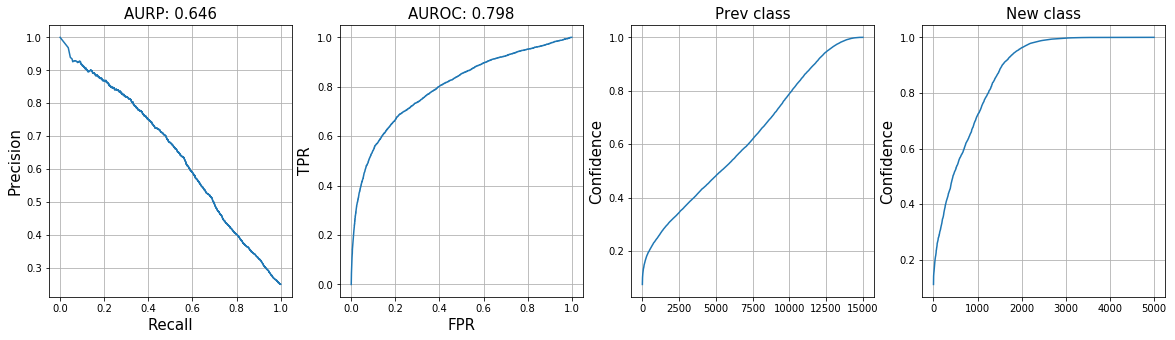

In [4]:
result = sio.loadmat(root+'191231_Imagenet_ood_0_memsz_20000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 5')

idx = 2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 5
AUROC
[0.85107118 0.8663523  0.85654159]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [74. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [67. 69. 83.  0.  0.  0.  0.  0.  0.  0.]
 [60. 58. 64. 83.  0.  0.  0.  0.  0.  0.]]
0.11512526
0.49131


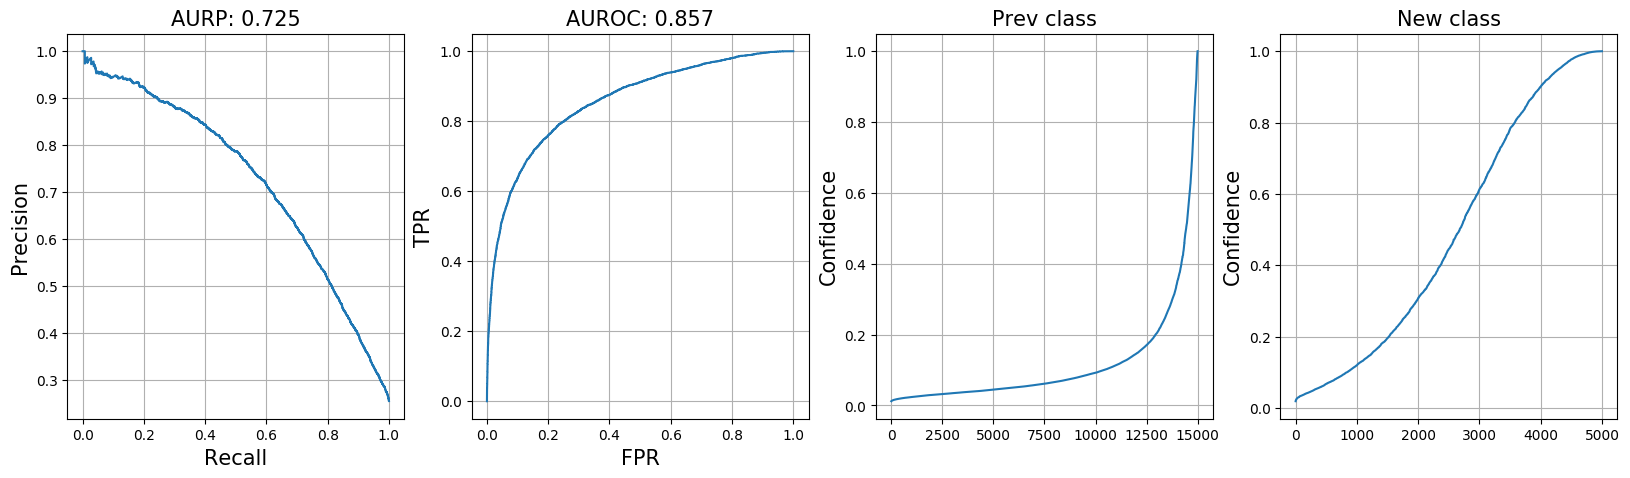

In [5]:
result = sio.loadmat(root+'191231_Imagenet_ood_0_memsz_20000_alpha_1_beta_10.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 5')

idx = 2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)


In [7]:
result = sio.loadmat(root+'200115_Imagenet_ood_0_memsz_20000_alpha_1_beta_0.0_base_100_replay_32_batch_32_epoch_100_factor_4_RingBuffer_CE_prev_new_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, alpha: 5')

idx = 2

print('AUROC')
# print(result['auroc'][0])
# print(result['task_soft_1'][:idx+2])

print(result['auroc'])
print(result['task_soft_1'][:idx+2])



aupr_auroc_prev_new(result, idx)



dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, alpha: 5
AUROC
[]
[[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


IndexError: index 0 is out of bounds for axis 0 with size 0